# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
weather_api_key = "12c815fb338fd83e28fc2eea1c57c38e"

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

City Name: taoudenni, City ID: 2450173
City Name: lebu, City ID: 3883457
City Name: sitka, City ID: 5557293
City Name: moscow, City ID: 524901
City Name: bethel, City ID: 5282297
City Name: happy valley-goose bay, City ID: 5970458
City Name: waitangi, City ID: 4032804
City Name: kerikeri, City ID: 2188874
City Name: alo, City ID: 2351470
City Name: gemena, City ID: 2315728
City Name: longyearbyen, City ID: 2729907
City Name: labytnangi, City ID: 1500933
City Name: sittwe, City ID: 1295765
City Name: portland, City ID: 5746545
City Name: sinabang, City ID: 1213721
City Name: hermanus, City ID: 3366880
City Name: port-aux-francais, City ID: 1546102
City not found. Skipping...
City Name: tazovsky, City ID: 1489853
City Name: edinburgh of the seven seas, City ID: 3370726
City Name: imbituba, City ID: 3461370
City Name: remire-montjoly, City ID: 3380892
City Name: east london, City ID: 1006984
City Name: adamstown, City ID: 4030723
City Name: rongelap, City ID: 7306520
City Name: badger, Ci

City Name: jaggayyapeta, City ID: 1269570
City Name: kudahuvadhoo, City ID: 1337607
City Name: chonchi, City ID: 3894871
City Name: akureyri, City ID: 2633274
City Name: nova vicosa, City ID: 3456102
City Name: vila velha, City ID: 3445026
City Name: brak, City ID: 2218478
City Name: la sarre, City ID: 6050194
City Name: kavaratti, City ID: 1267390
City Name: holualoa, City ID: 5856050
City Name: mogadishu, City ID: 53654
City Name: dalandzadgad, City ID: 2032007
City Name: dabakala, City ID: 2290609
City Name: tolanaro, City ID: 1055433
City Name: qalat, City ID: 1130131
City Name: gadzhiyevo, City ID: 562245
City Name: safi, City ID: 2537878
City Name: saldanha, City ID: 3361934
City Name: metlili chaamba, City ID: 2487620
City Name: hajjah, City ID: 75337
City Name: carnarvon, City ID: 2074865
City Name: chibougamau, City ID: 5921147
City Name: luderitz, City ID: 3355672
City Name: hawaiian paradise park, City ID: 5855809
City Name: jalai nur, City ID: 2036595
City Name: byron bay, 

City Name: giridih, City ID: 1271175
City Name: keelung, City ID: 1678228
City Name: kristiansund, City ID: 6453331
City Name: guadalajara, City ID: 4005539
City Name: fort bragg, City ID: 6941080
City Name: belomorsk, City ID: 577922
City Name: revelstoke, City ID: 6121621
City Name: pimentel, City ID: 3693584
City Name: san angelo, City ID: 5530022
City Name: las lomitas, City ID: 3848164
City Name: tazacorte, City ID: 6534196
City Name: shitanjing, City ID: 1794971
City Name: hola, City ID: 756316
City Name: ust'-kulom, City ID: 478050
City Name: rikaze, City ID: 1279715
City Name: balsas, City ID: 3406545
City Name: tan-tan, City ID: 2530241
City Name: pontal do parana, City ID: 6322927
City Name: bol, City ID: 2434979
City Name: at taj, City ID: 88562
City Name: malvan, City ID: 1264007
City Name: necochea, City ID: 3430443
City Name: usinsk, City ID: 863061
City Name: narvik, City ID: 3144987
City Name: namibe, City ID: 3347019
City Name: campbell river, City ID: 5914132
City Nam

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})

# Show Record Count
city_data_df.count()

City ID        561
City           561
Country        561
Lat            561
Lng            561
Temperature    561
Humidity       561
Clouds         561
Wind Speed     561
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,2450173,Taoudenni,ML,22.6783,-3.9836,116.28,8,77,3.13
1,3883457,Lebu,CL,-37.6167,-73.6500,57.36,81,98,5.46
2,5557293,Sitka,US,57.0531,-135.3300,58.89,82,100,8.05
3,524901,Moscow,RU,55.7522,37.6156,71.96,52,89,4.41
4,5282297,Bethel,US,41.3712,-73.4140,71.87,58,0,10.36


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/city_weather.csv", index=False, header=True)

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

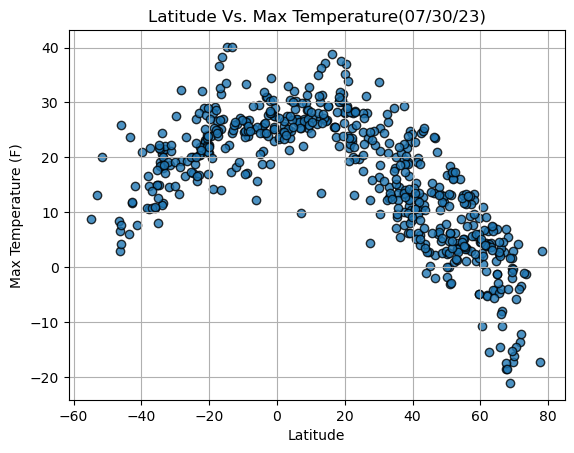

In [9]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]

plt.scatter(lat,
            max_temp,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

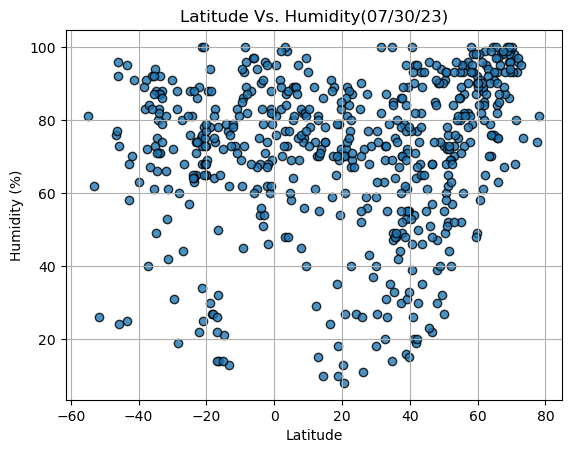

In [10]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]

plt.scatter(lat,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

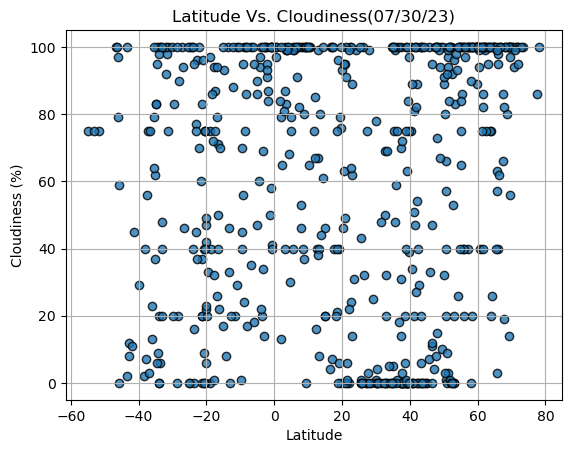

In [12]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]

plt.scatter(lat,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

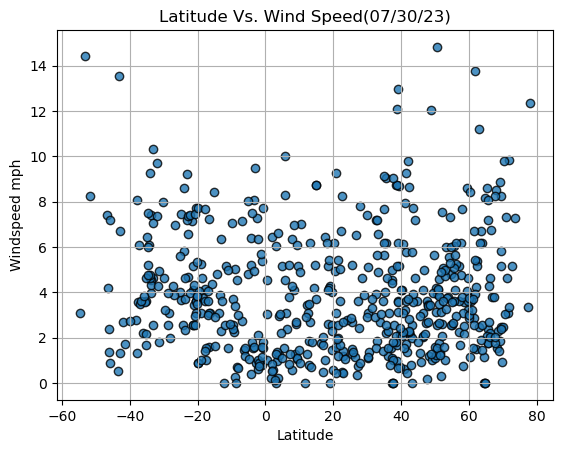

In [14]:
# Build the scatter plots for latitude vs. wind speed
windspeed = city_data_df["Wind Speed"]

plt.scatter(lat,
            windspeed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8462548186825359


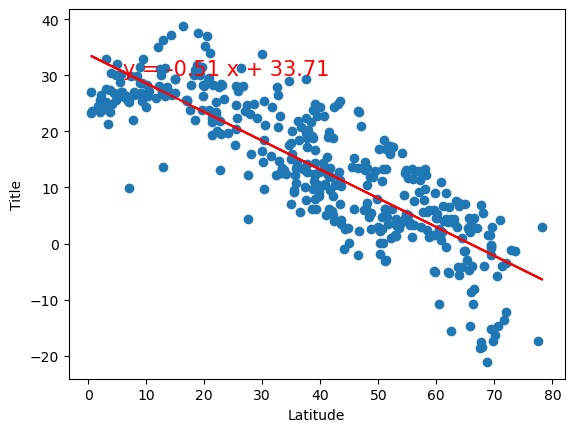

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.6419546065421794


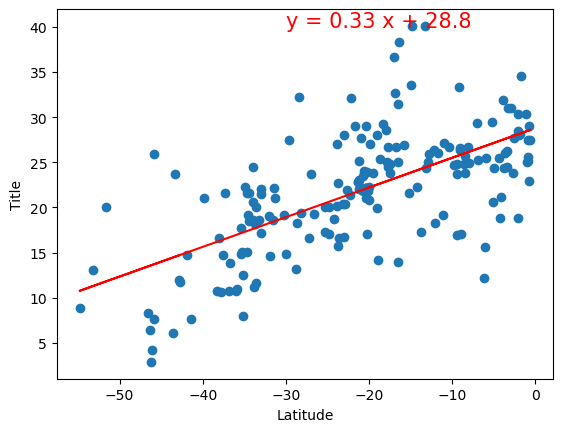

In [19]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.23853179129394056


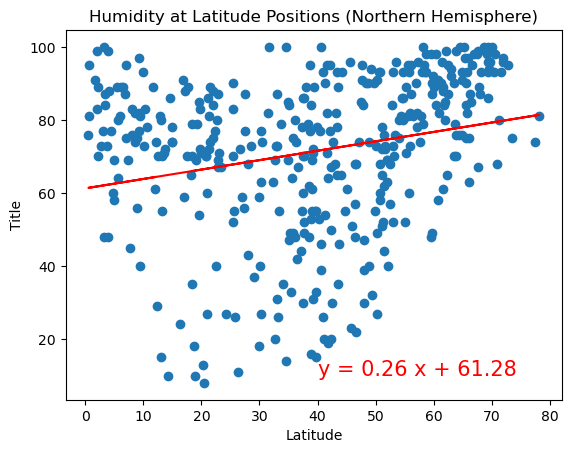

In [24]:
# Northern Hemisphere
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.ylabel('Humidity (%)')
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))


The r-squared is: 0.0167593169500568


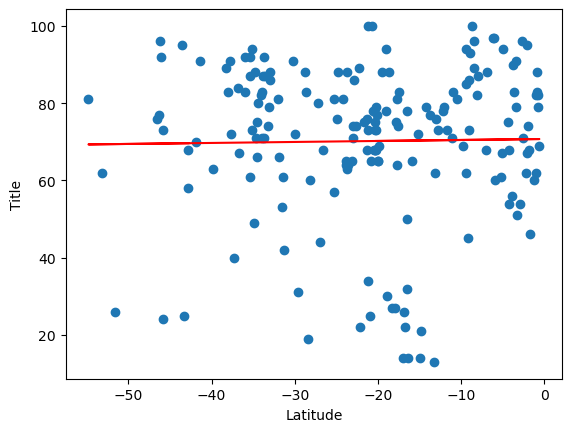

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

In [ ]:
#There does not seem to be a very strong correlation between humidity and latitude. 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.15500489387697095


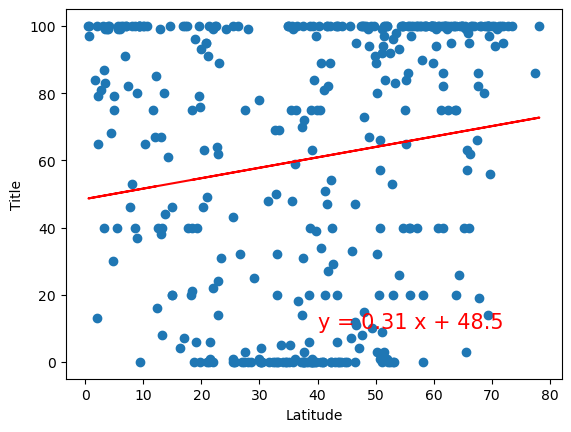

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.14341322916643243


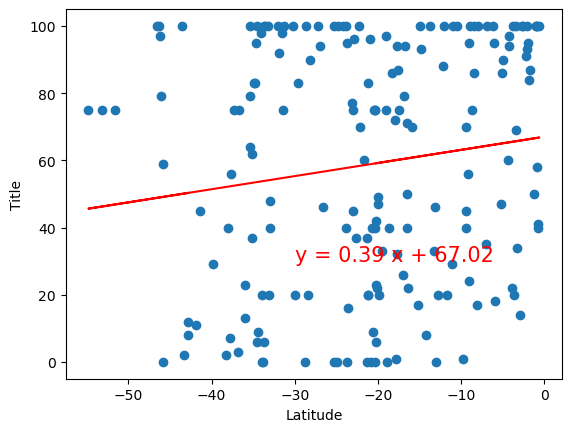

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

In [ ]:
#There does not seem to be much correlation between cloudiness and latitude when you look at the plots. In the northern hemisphere, it gets slightly more cloudy the further away you are from the equator, and slightly less cloudy the further away you are.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.17434667290903333


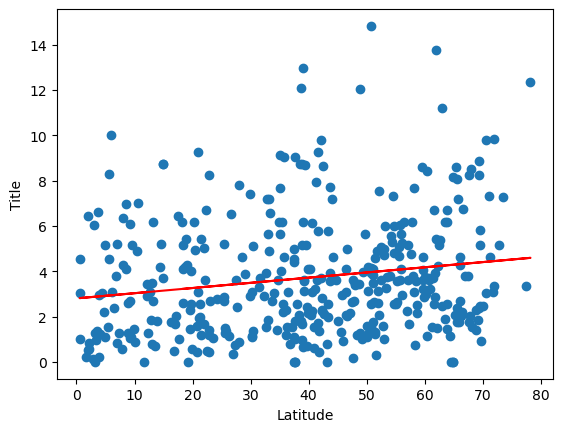

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: -0.24947753546264587


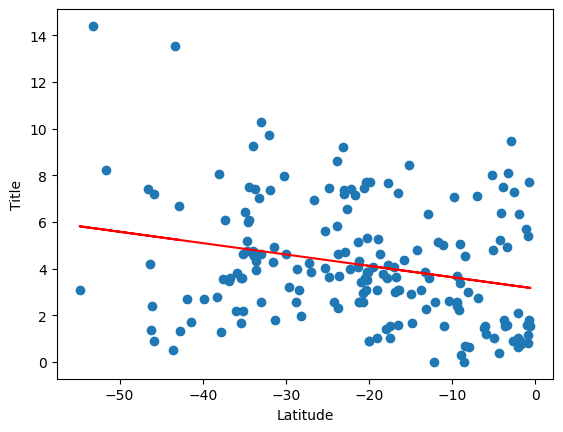

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
There is a mild correlation in that the further you get away from the equator, the higher the windspeed tends to be. The regression line, however, shows that it there isn't a very strong correlation. 